In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
from dataclasses import dataclass, asdict
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [126]:
@dataclass
class Ride:
    index: int
    a: int
    b: int
    x: int
    y: int
    s: int
    f: int
        
def read_int_line(fp):
    return [int(i) for i in fp.readline().strip("\n").split(" ")]

class Problem:
    def __init__(self, path):
        fp = path.open("r")
        self.R, self.C, self.F, self.N, self.B, self.T = read_int_line(fp)
        self.problems = []
        self.problem_df = []
        
        for index in range(self.N):
            self.problems.append(Ride(index, *read_int_line(fp)))
            
        for field in ["a", "b", "x", "y", "s", "f"]:
            setattr(self, field, np.array([getattr(p, field) for p in self.problems]))
            
        self.df = pd.DataFrame([{**asdict(p), "problem": path.name[0], "t": self.T} for p in self.problems])


In [127]:
problems = {file.name[0]: Problem(file) for file in Path("data").glob("*.txt")}

In [128]:
df = pd.concat([p.df for p in problems.values()])
df.sort_values(by="problem", inplace=True)

In [129]:
df["length"] = abs(df.y - df.b) + abs(df.x - df.a)

In [130]:
df["relative_start"] = df.s / df.t

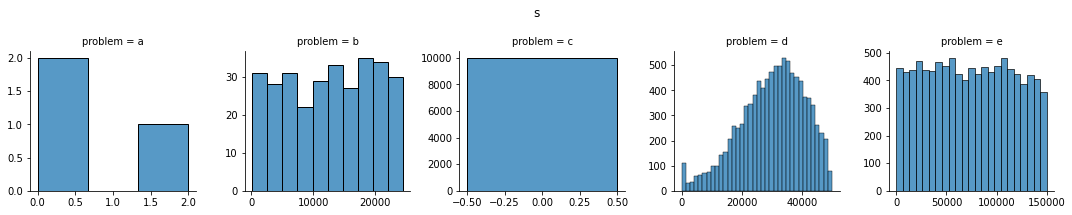

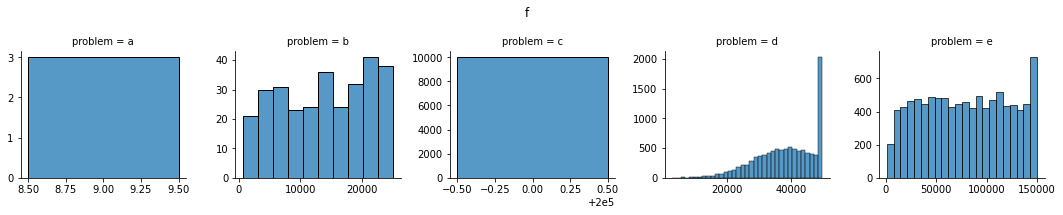

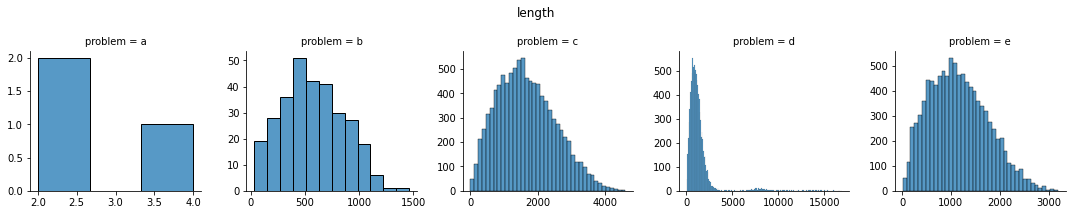

In [58]:
for column in ["s", "f", "length"]:
    g = sns.FacetGrid(df, col="problem", sharex=False, sharey=False)
    g.map_dataframe(sns.histplot, x=column)
    plt.suptitle(column)
    plt.tight_layout()
    plt.show()

In [108]:
def plot_starts_finishes(df):
    fig, axes = plt.subplots(1, 5, figsize=(30, 4))
    for i, (problem, group_df) in enumerate(df.groupby("problem")):
        h = axes[i].hist2d(group_df.a, group_df.b, bins=50, norm=Normalize())
        axes[i].set_title(problem)
        fig.colorbar(h[3], ax=axes[i])
    plt.suptitle("Starts")
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 5, figsize=(30, 4))
    for i, (problem, group_df) in enumerate(df.groupby("problem")):
        h = axes[i].hist2d(group_df.x, group_df.y, bins=50)
        axes[i].set_title(problem)
        fig.colorbar(h[3], ax=axes[i])
    plt.suptitle("Finishes")
    plt.tight_layout()
    plt.show()

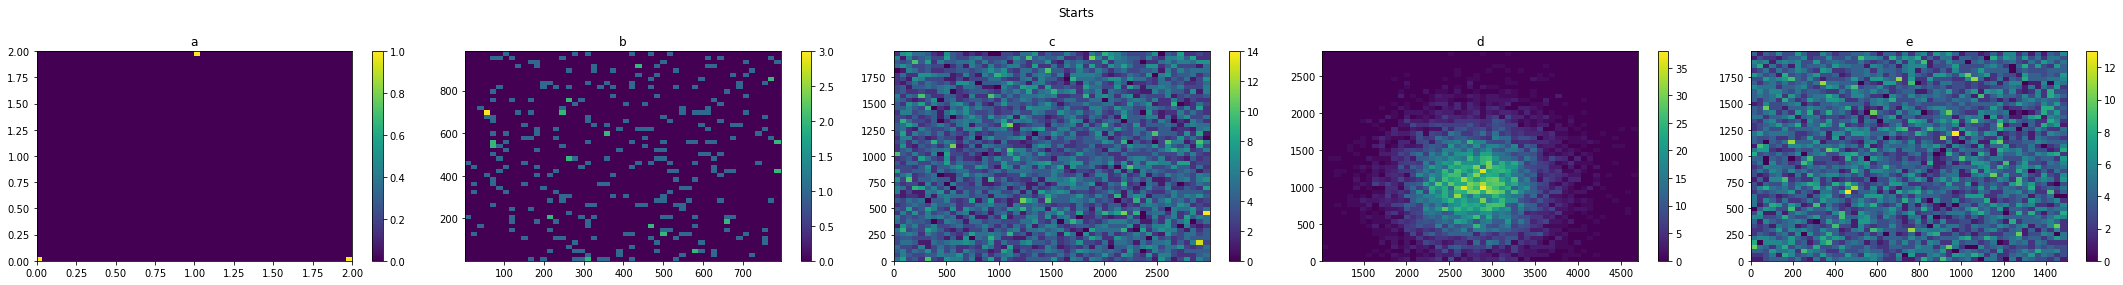

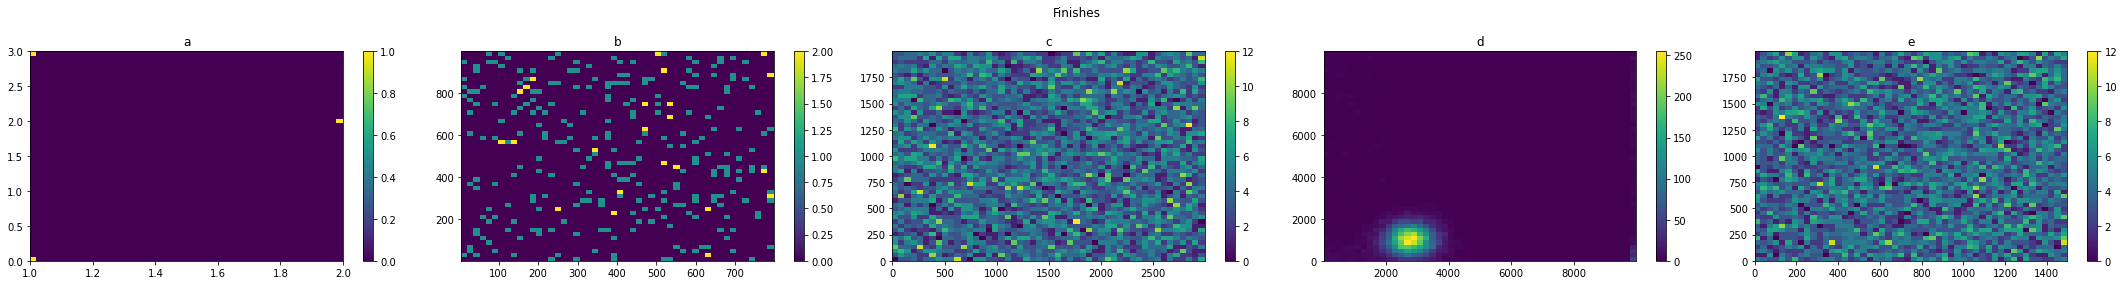

In [131]:
plot_starts_finishes(df)